# XGBoost

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [5]:
import xgboost as xgb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.0001, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.1, 1.0),
                'colsample_bytree': Real(0.1, 1.0)
            }

In [6]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}XGBoost/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)

In [3]:
xgb_model.fit_params_search = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_train, xgb_model.y_train)],
                "verbose": True
            }

# Busqueda Hiperparametros

In [ ]:
opt_xgb, best_params_xgb = xgb_model.search_best_model(n_iter_=5, save_result=False)
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/XGBoost/Modelos/opt_XGB_model_all_features.pickle', 'wb') as file:
        #pickle.dump(opt_xgb, file)

In [6]:
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/XGBoost/Modelos/opt_XGB_model_400iter.pickle', 'wb') as file:
#        pickle.dump(opt_xgb, file)

In [7]:
with open(f'{path}Opt_Model/opt_XGB_model_400iter.pickle', 'rb') as file:
    opt_xgb= pickle.load(file)

In [5]:
resultados = xgb_model.opt_model.cv_results_
xgb_model.guardar_resultados_busqueda(resultados=resultados)

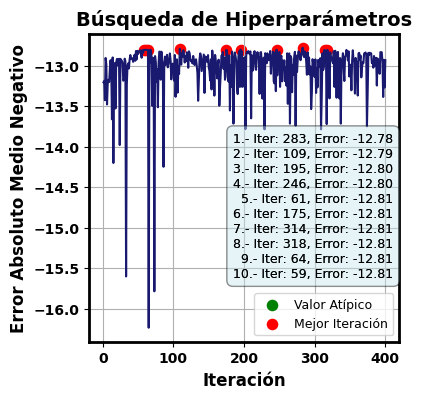

Top 1: Iteración 283, Error -12.780233929998849
Top 2: Iteración 109, Error -12.793820683403547
Top 3: Iteración 195, Error -12.803317237638433
Top 4: Iteración 246, Error -12.80498076717742
Top 5: Iteración 61, Error -12.80654194959161
Top 6: Iteración 175, Error -12.806634989667387
Top 7: Iteración 314, Error -12.806638724680909
Top 8: Iteración 318, Error -12.806788313035394
Top 9: Iteración 64, Error -12.80695508927229
Top 10: Iteración 59, Error -12.80706503167492


In [8]:
xgb_model.plot_search_best_model(opt_xgb, linewidth=1.5, color='midnightblue')

In [9]:
best_params_xgb = xgb_model.best_hyper(opt_xgb)

In [10]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.01675572119197379,
  'max_depth': 7,
  'n_estimators': 550,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01060840668624734,
  'max_depth': 10,
  'n_estimators': 3000,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 757,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 709,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 660,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.013064571589864016,
  'max_depth': 8,
  'n_estimators': 380,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 875,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 872,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_r

# Trainer

In [8]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 55,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

In [22]:
xgb_model.guardar_resultados_trainer(resultados=results)

In [11]:
with open('C:/Users/felipe/Documents/Opt_Model/BestModel_XGB_all_features.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open('C:/Users/felipe/Documents/Opt_Model/results_XGB_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)

In [11]:
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/BestModel_XGB_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/results_XGB_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [12]:
xgb_model.model= model

In [13]:
y_pred=xgb_model.predicter(xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           5.89e-38
Time:                        20:00:50   Log-Likelihood:                -1011.4
No. Observations:                 276   AIC:                             2027.
Df Residuals:                     274   BIC:                             2034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5831      1.459     19.588      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


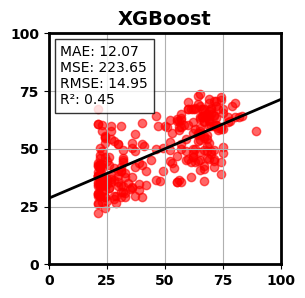

Error medio absoluto: 12.065776792701316
Error cuadrático medio: 223.65012657338417
Raíz del error cuadrático medio: 14.954936528564211
Coeficiente de determinación (R²): 0.44737807091447934


In [14]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, x_size=3,y_size=3,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100,x_min_limit=0,y_min_limit=0,title='XGBoost',label=False,color='red', color_line_fit="black",  line_ideal=False,confidence_interval=False,legend=False,  alpha=0.6)

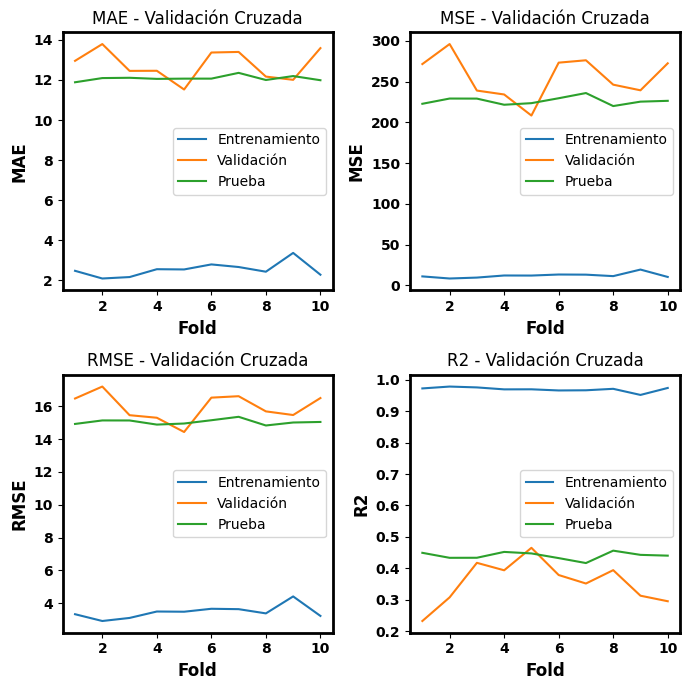

In [14]:
xgb_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           5.89e-38
Time:                        20:01:14   Log-Likelihood:                -1011.4
No. Observations:                 276   AIC:                             2027.
Df Residuals:                     274   BIC:                             2034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5831      1.459     19.588      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


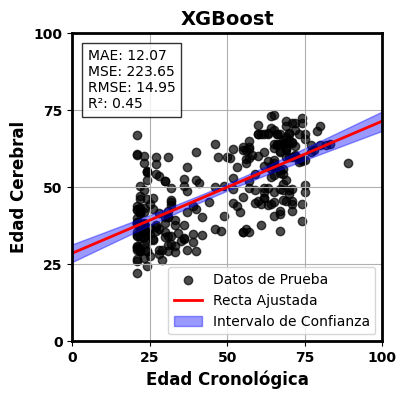

Error medio absoluto: 12.065776792701316
Error cuadrático medio: 223.65012657338417
Raíz del error cuadrático medio: 14.954936528564211
Coeficiente de determinación (R²): 0.44737807091447934


In [15]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Datos de Prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Edad Cronológica',ylabel='Edad Cerebral',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

# ...

In [9]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 619.3275146484375
IAF_OCC_left: 462.55401611328125
IAF_OCC_right: 425.3502197265625
High_subj_spec_EPP_CING_right: 368.021728515625
Low_subj_spec_EPP_PARIET_right: 343.9888000488281
Low_subj_spec_RPD_CING_right: 245.73944091796875
Low_subj_spec_RPD_OCC_left: 233.5476837158203
Low_subj_spec_EPP_PARIET_left: 231.98471069335938
Low_subj_spec_RPD_HPC_left: 219.37738037109375
Low_subj_spec_EPP_CING_left: 206.8505859375
High_subj_spec_RPD_CING_right: 188.07705688476562
Alpha2_canon_RPD_CING_right: 183.1248779296875
Alpha2_canon_EPP_HPC_left: 178.1586456298828
High_subj_spec_EPP_OCC_left: 157.07545471191406
Low_subj_spec_RPD_HPC_right: 147.96627807617188
Alpha2_canon_EPP_PARIET_left: 135.04867553710938
Alpha2_canon_EPP_PARIET_right: 118.7411880493164
High_subj_spec_EPP_PARIET_right: 117.6439208984375
Low_subj_spec_RPD_CING_left: 116.20232391357422
Low_subj_spec_RPD_PARIET_left: 113.37508392333984
Low_s

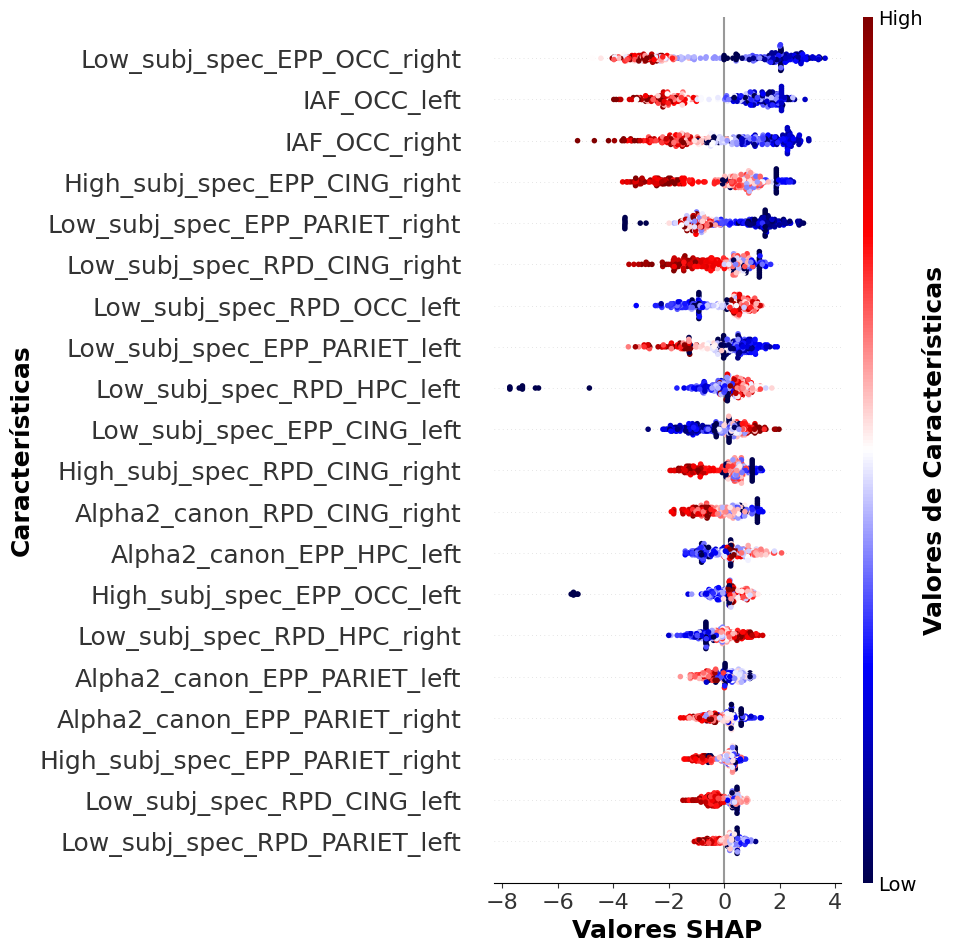

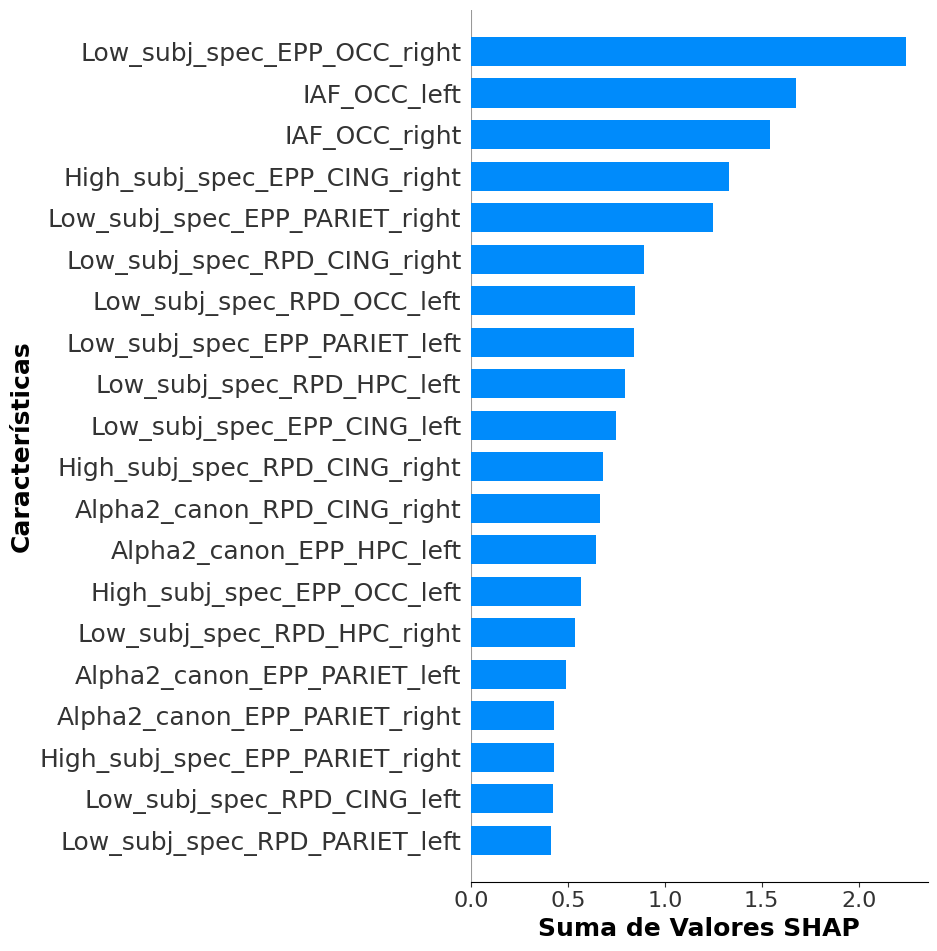

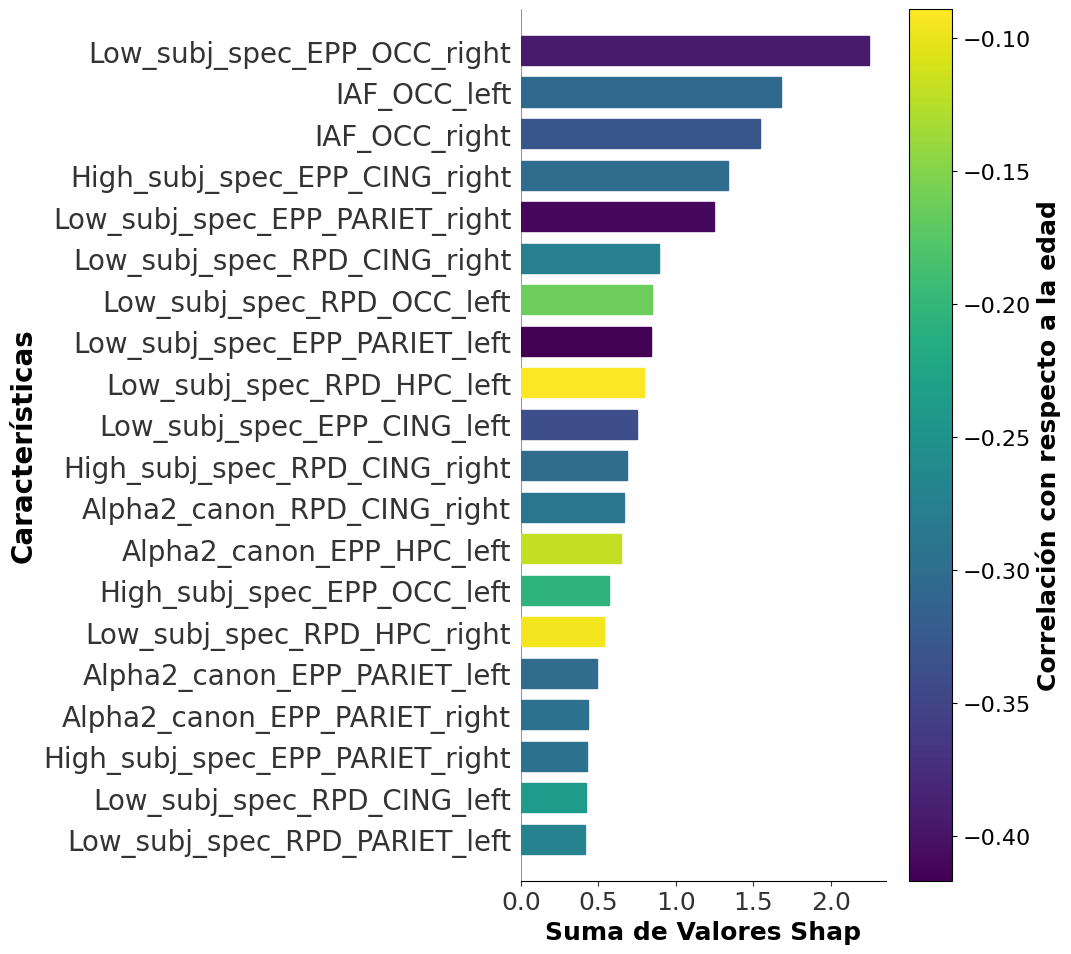

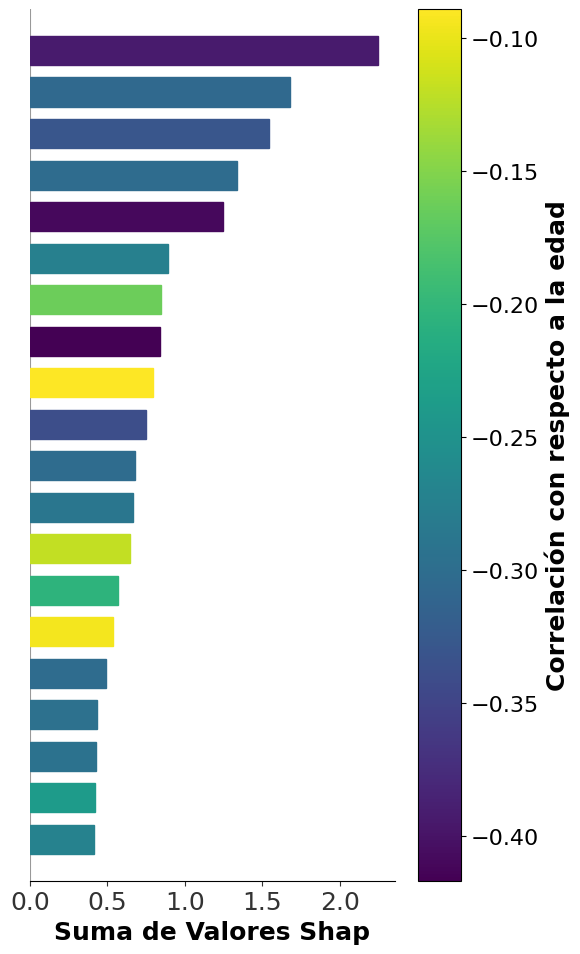

In [9]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test, save_fig=True)

In [38]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_xgb.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

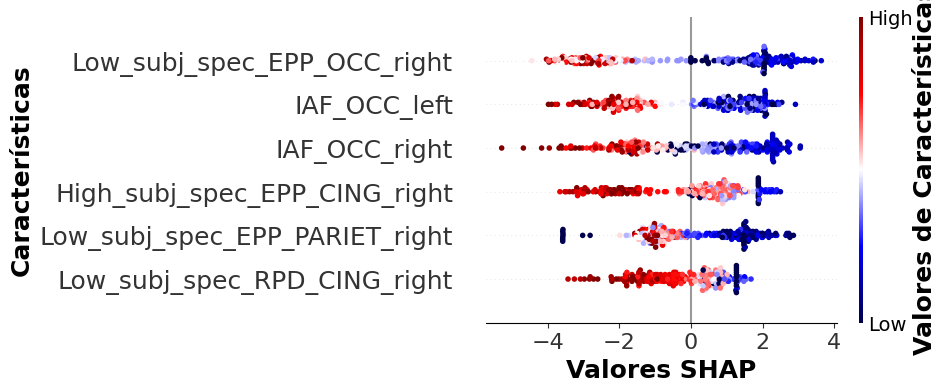

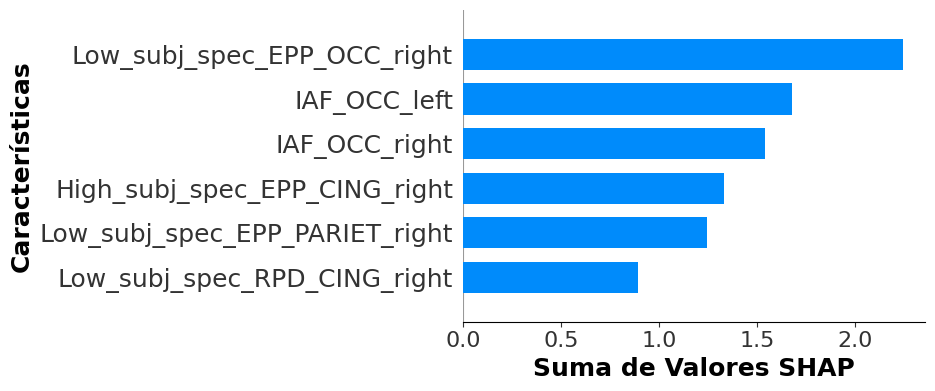

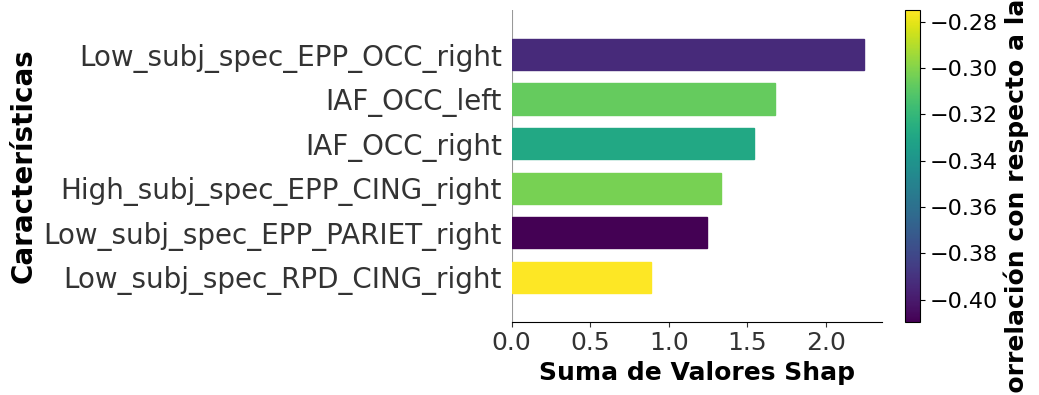

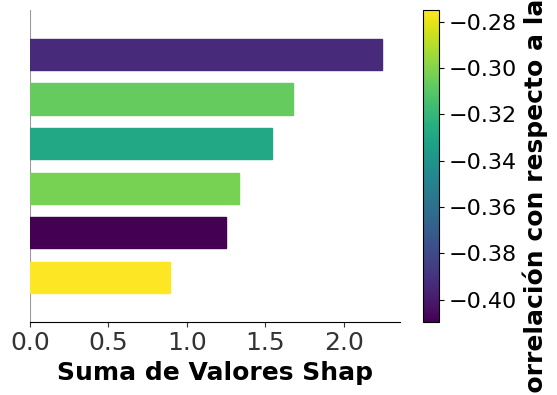

In [10]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test, max_features=6)

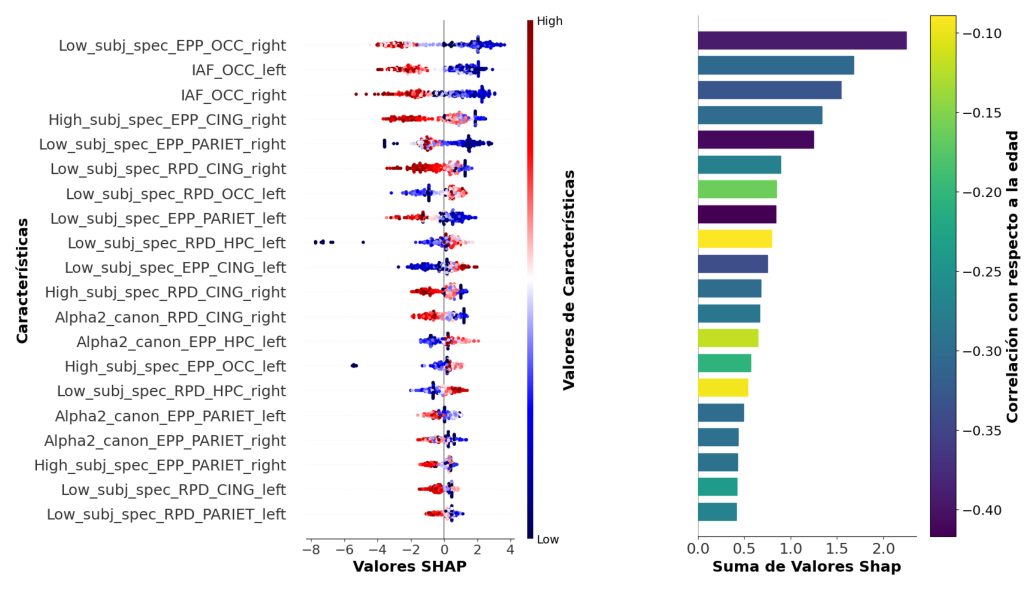

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/figuras/xgb_shap.png",
    "C:/Users/felipe/Documents/figuras/xgb_shap2_nolabel.png",
]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar cada imagen en los subplots respectivos
for i, imagen_path in enumerate(imagenes):
    img = mpimg.imread(imagen_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Ocultar ejes

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


# Importancia por region

In [5]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_xgb.pickle', 'rb') as file:
    shap_summary_sorted_xgb = pickle.load(file)


In [6]:
shap_por_region_sorted, resultado_normalizado_sorted=xgb_model.shap_region(shap_summary_sorted=shap_summary_sorted_xgb, num_max=20)

OCC_right: 1.000000
CING_right: 0.942839
OCC_left: 0.816689
PARIET_right: 0.555553
PARIET_left: 0.459863
HPC_left: 0.380535
CING_left: 0.309237
HPC_right: 0.141638


In [7]:
resultado_normalizado_sorted

{'OCC_right': 1.0,
 'CING_right': 0.9428391855573732,
 'OCC_left': 0.8166893257770507,
 'PARIET_right': 0.5555530570810937,
 'PARIET_left': 0.45986284032484226,
 'HPC_left': 0.3805346021266651,
 'CING_left': 0.3092369055269923,
 'HPC_right': 0.14163820401963076}

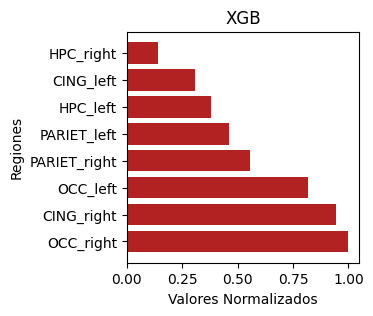

In [8]:
xgb_model.plot_normalized_values(resultado_normalizado_sorted, color='firebrick', name_set='XGB',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


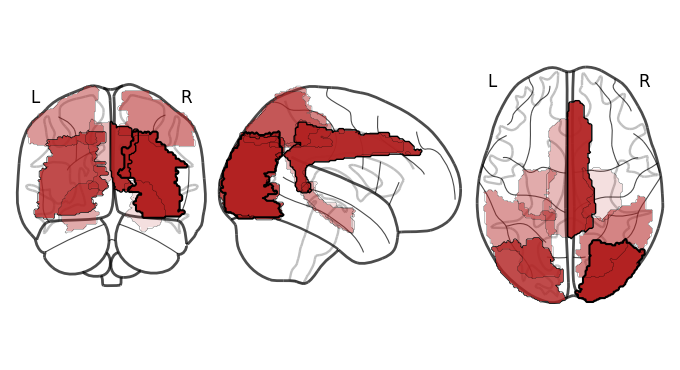

In [9]:
base_path = 'C:/Users/felipe/Documents/brain_age_/cerebritos/'

xgb_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='firebrick')

# Incremento de Metricas


In [ ]:
resultado_incremento = xgb_model.evaluacion_incremento_metricas(shap_values=shap_values,n_iter=100)


In [ ]:
xgb_model.guardar_incremento_metricas(results_metricas=resultado_incremento)


In [ ]:
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/XGBoost/Modelos/resultado_incremento_XGB_model_all_features.pickle', 'wb') as file:
    pickle.dump(resultado_incremento, file)

In [30]:
with open('C:/Users/felipe/Documents/Opt_Model/resultado_incremento_XGB_model_all_features.pickle', 'rb') as file:
    resultado_incremento= pickle.load(file)

In [ ]:
resultado_incremento

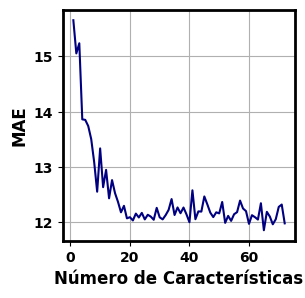

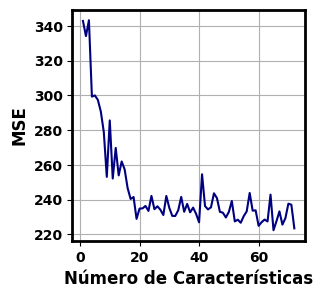

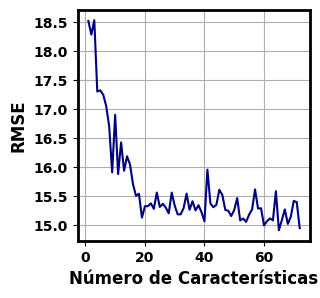

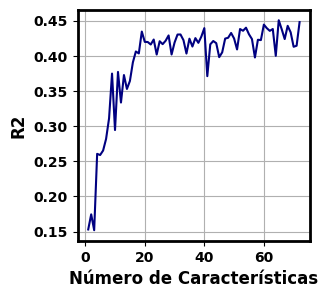

In [4]:
xgb_model.plot_incremento_metricas(resultado_incremento, x_size=3, y_size=3)

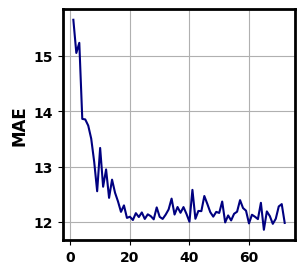

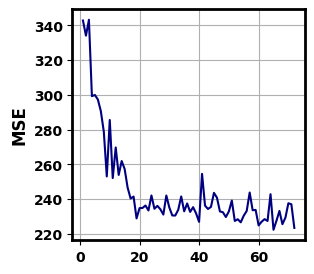

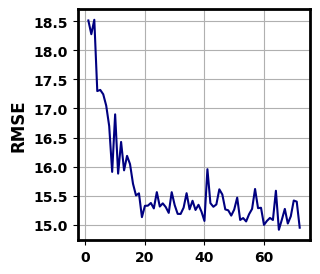

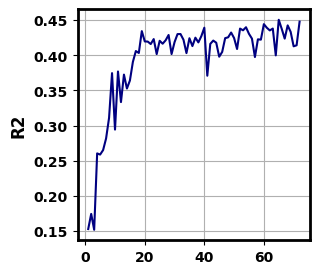

In [5]:
xgb_model.plot_incremento_metricas(resultado_incremento, x_size=3, y_size=3, label_x=False)

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_MAE_all_features.png",
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_MSE_all_features.png",
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_RMSE_all_features.png",
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_R2_all_features.png",
    
]

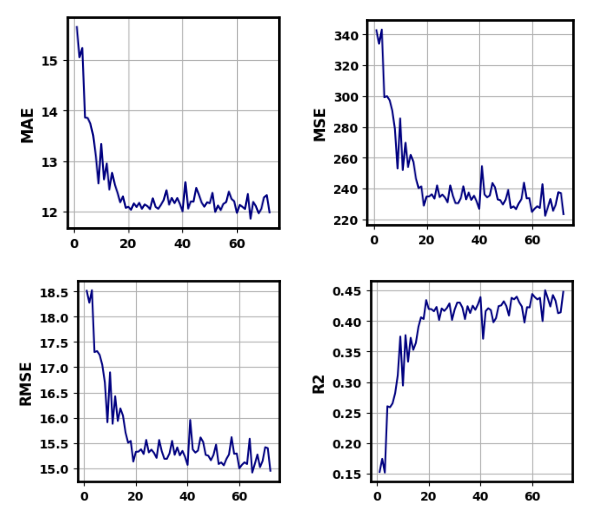

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MAE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_RMSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_R2_all_features.png",
]

# Crear una figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Iterar sobre las imágenes y ejes para mostrar cada imagen en la cuadrícula
for ax, img_path in zip(axes.flatten(), imagenes):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Ocultar los ejes

# Ajustar el diseño
plt.tight_layout()

# Agregar un título general
#plt.suptitle('', fontweight='bold', fontsize=14)

# Ajustar el espacio superior para el título
plt.subplots_adjust(top=0.9)

# Mostrar el gráfico
plt.show()

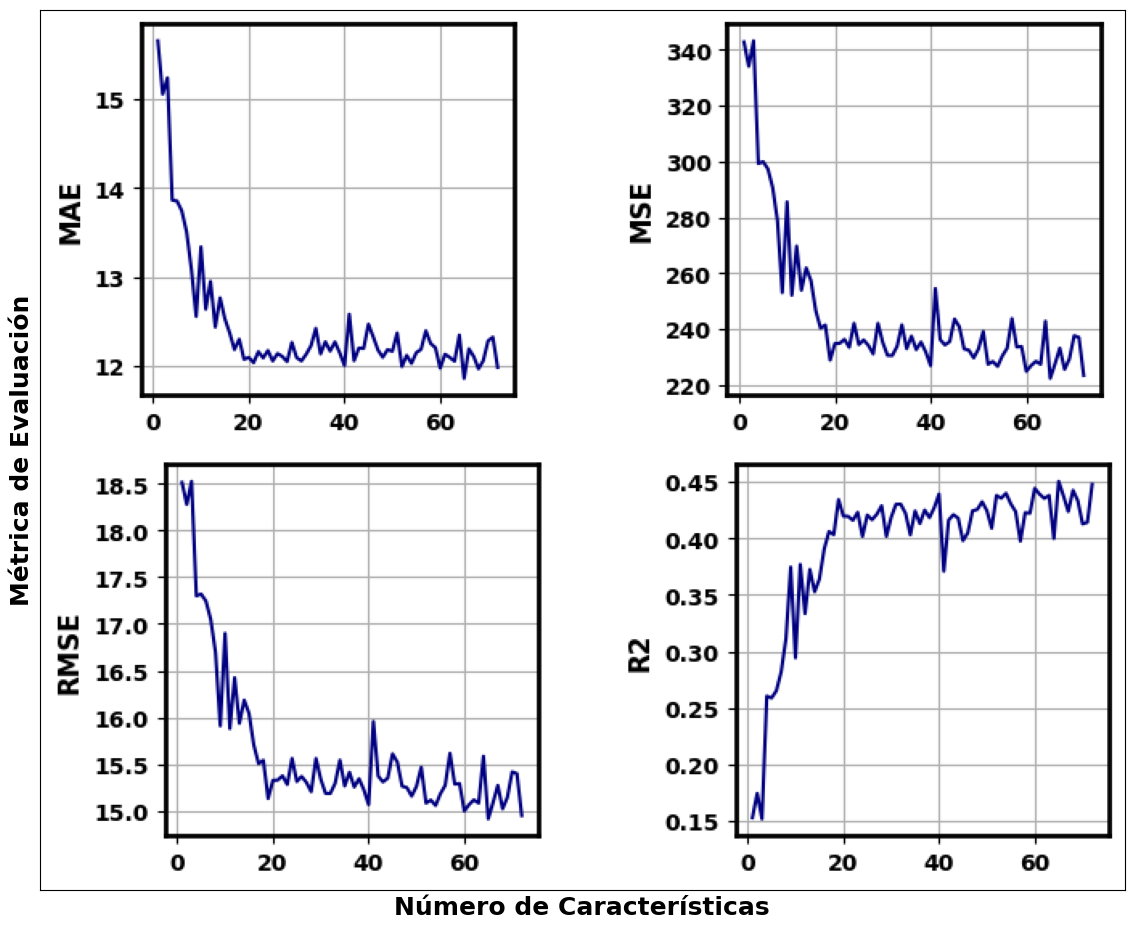

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MAE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_RMSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_R2_all_features.png",
]

# Cargar las imágenes con PIL para obtener sus dimensiones
imagenes_abiertas = [Image.open(img) for img in imagenes]
ancho, alto = imagenes_abiertas[0].size

# Definir un desplazamiento adicional para la separación horizontal
desplazamiento_horizontal = 50

# Crear una nueva imagen en blanco con el tamaño adecuado
ancho_compuesto = ancho * 2 + desplazamiento_horizontal +15
alto_compuesto = alto * 2
imagen_compuesta = Image.new('RGB', (ancho_compuesto, alto_compuesto), (255, 255, 255))  # Fondo blanco

# Pegar las imágenes abiertas en la imagen compuesta
for i, imagen in enumerate(imagenes_abiertas):
    x = (i % 2) * (ancho + desplazamiento_horizontal)
    y = (i // 2) * alto
    imagen_compuesta.paste(imagen, (x, y))

# Convertir a un formato que Matplotlib pueda mostrar
imagen_compuesta = imagen_compuesta.convert("RGB")

# Mostrar la imagen compuesta usando Matplotlib
plt.figure(figsize=(14, 14))  # Ajustar el tamaño de la figura
plt.imshow(imagen_compuesta)
plt.xticks([])  # Ocultar los números del eje X
plt.yticks([])  # Ocultar los números del eje Y
plt.xlabel('Número de Características', fontweight='bold', fontsize=18)  # Añadir etiqueta al eje X
plt.ylabel('Métrica de Evaluación', fontweight='bold', fontsize=18)  # Añadir etiqueta al eje Y
plt.show()


In [ ]:
resultado_incremento

# Entrenamiento con las 20 mejores metricas

In [16]:
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/shap_summary_sorte_xgb.pickle', 'rb') as file:
    shap_summary_sorted= pickle.load(file)

In [17]:
shap_summary_sorted

[('Low_subj_spec_EPP_OCC_right', 619.3275),
 ('IAF_OCC_left', 462.55402),
 ('IAF_OCC_right', 425.35022),
 ('High_subj_spec_EPP_CING_right', 368.02173),
 ('Low_subj_spec_EPP_PARIET_right', 343.9888),
 ('Low_subj_spec_RPD_CING_right', 245.73944),
 ('Low_subj_spec_RPD_OCC_left', 233.54768),
 ('Low_subj_spec_EPP_PARIET_left', 231.98471),
 ('Low_subj_spec_RPD_HPC_left', 219.37738),
 ('Low_subj_spec_EPP_CING_left', 206.85059),
 ('High_subj_spec_RPD_CING_right', 188.07706),
 ('Alpha2_canon_RPD_CING_right', 183.12488),
 ('Alpha2_canon_EPP_HPC_left', 178.15865),
 ('High_subj_spec_EPP_OCC_left', 157.07545),
 ('Low_subj_spec_RPD_HPC_right', 147.96628),
 ('Alpha2_canon_EPP_PARIET_left', 135.04868),
 ('Alpha2_canon_EPP_PARIET_right', 118.74119),
 ('High_subj_spec_EPP_PARIET_right', 117.64392),
 ('Low_subj_spec_RPD_CING_left', 116.202324),
 ('Low_subj_spec_RPD_PARIET_left', 113.375084),
 ('Low_subj_spec_RPD_OCC_right', 105.09934),
 ('High_subj_spec_EPP_HPC_right', 97.89762),
 ('Low_subj_spec_EPP_HPC

In [18]:
top_20_features = [feature[0] for feature in shap_summary_sorted[:20]]

In [19]:
X_train = xgb_model.X_train[top_20_features]
X_test = xgb_model.X_test[top_20_features]  

In [20]:
X_train

,Low_subj_spec_EPP_OCC_right,IAF_OCC_left,IAF_OCC_right,High_subj_spec_EPP_CING_right,Low_subj_spec_EPP_PARIET_right,Low_subj_spec_RPD_CING_right,Low_subj_spec_RPD_OCC_left,Low_subj_spec_EPP_PARIET_left,Low_subj_spec_RPD_HPC_left,Low_subj_spec_EPP_CING_left,High_subj_spec_RPD_CING_right,Alpha2_canon_RPD_CING_right,Alpha2_canon_EPP_HPC_left,High_subj_spec_EPP_OCC_left,Low_subj_spec_RPD_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,High_subj_spec_EPP_PARIET_right,Low_subj_spec_RPD_CING_left,Low_subj_spec_RPD_PARIET_left
90,0.487541,0.843750,0.875000,0.370318,0.796642,0.326273,0.332177,0.705040,0.208007,0.464448,0.370318,0.639835,0.443012,0.357270,0.390519,0.503964,0.557059,0.429993,0.257983,0.420348
875,0.051243,0.291667,0.114583,0.160232,0.161374,0.195012,0.171450,0.198702,0.180316,0.188425,0.160232,0.227707,0.246819,0.163951,0.215902,0.392366,0.173703,0.176537,0.236556,0.497486
1071,0.142075,0.187500,0.197917,0.226160,0.157601,0.288595,0.270516,0.043184,0.090282,0.133776,0.226160,0.289306,0.110016,0.239541,0.102302,0.254145,0.242630,0.308902,0.307341,0.392550
262,0.098574,0.322917,0.343750,0.152320,0.173004,0.196813,0.155435,0.192586,0.086863,0.127470,0.152320,0.159159,0.107690,0.149700,0.132519,0.171272,0.153490,0.167075,0.196681,0.252950
680,0.011097,0.000000,0.000000,0.094274,0.020399,0.119976,0.132959,0.063040,0.081681,0.012727,0.094274,0.128172,0.111676,0.127724,0.129119,0.188762,0.173093,0.186980,0.127846,0.255791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.072804,0.083333,0.072917,0.238912,0.136618,0.299883,0.284587,0.129358,0.189364,0.031523,0.238912,0.312470,0.241545,0.272873,0.282595,0.280236,0.254759,0.279437,0.316628,0.363259
905,0.274133,0.562500,0.552083,0.227772,0.389545,0.230374,0.275785,0.495726,0.231332,0.262851,0.227772,0.343200,0.347318,0.305934,0.275486,0.387011,0.336943,0.287768,0.208168,0.407738
1096,0.186708,0.281250,0.291667,0.188912,0.483197,0.235172,0.219322,0.489033,0.118949,0.337502,0.188912,0.278745,0.191804,0.223372,0.278333,0.391482,0.347137,0.318646,0.242120,0.363607
235,0.115400,0.156250,0.166667,0.171967,0.149962,0.176944,0.269187,0.313845,0.185259,0.284546,0.171967,0.232715,0.214283,0.250725,0.313251,0.286065,0.265898,0.292487,0.188728,0.372461


In [ ]:
opt_model_top20, parametros_top20 = xgb_model.search_best_model(X=X_train, n_iter_=400)


In [21]:
with open(f'{path}Opt_Model/opt_XGB_model_top20_400iter.pickle', 'rb') as file:
    opt_model_top20 = pickle.load(file)

C:\Users/felipe/Documents/Brain\base_regressor.py:312: RuntimeWarning: overflow encountered in exp
  return C * (1-np.exp(-t / tau)) + b


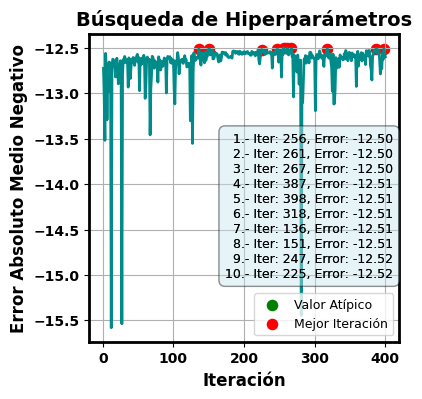

Top 1: Iteración 256, Error -12.497718028366126
Top 2: Iteración 261, Error -12.503275525314118
Top 3: Iteración 267, Error -12.50416547286325
Top 4: Iteración 387, Error -12.506859209871408
Top 5: Iteración 398, Error -12.507829499053331
Top 6: Iteración 318, Error -12.50861124257393
Top 7: Iteración 136, Error -12.510437113022238
Top 8: Iteración 151, Error -12.510550341719394
Top 9: Iteración 247, Error -12.51580524703892
Top 10: Iteración 225, Error -12.517433566453512


In [22]:
xgb_model.plot_search_best_model(opt_model_top20, color='darkcyan', linewidth=2)

In [23]:
best_params_xgb_top20 = xgb_model.best_hyper(opt_model_top20)

In [13]:
best_params_xgb_top20

[{'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 2484,
  'subsample': 0.7373295146328742},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 2491,
  'subsample': 0.7373729983839821},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 2494,
  'subsample': 0.7354946261472879},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 1715,
  'subsample': 0.7337785438091746},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 6,
  'n_estimators': 1679,
  'subsample': 0.7260906446075482},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 4839,
  'subsample': 0.7361397943318165},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 2093,
  'subsample': 0.7373214370444519},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 20

In [24]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(X_train=X_train,X_test=X_test,params_=best_params_xgb_top20[0])

In [47]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2484, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

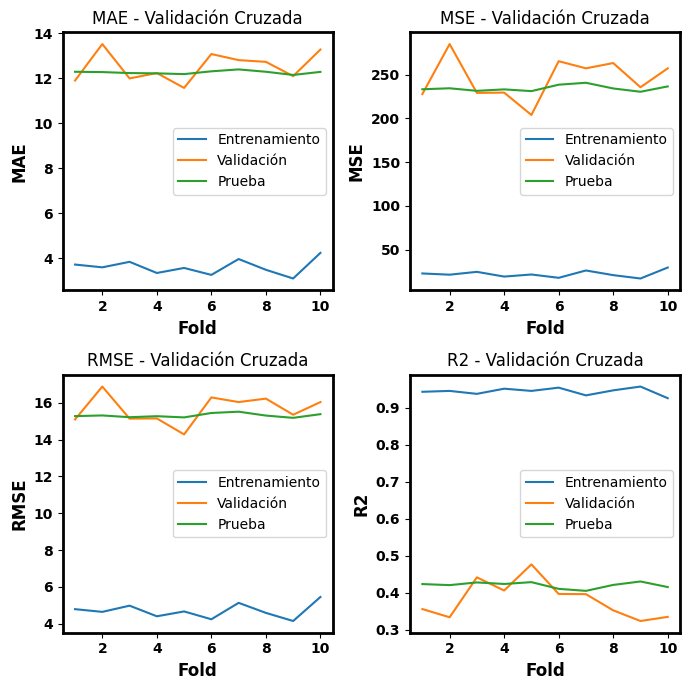

In [16]:
xgb_model.plot_metricas_evaluacion(results)

In [26]:
y_pred_top20=xgb_model.predicter(X_test=X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           9.77e-36
Time:                        20:05:40   Log-Likelihood:                -1017.1
No. Observations:                 276   AIC:                             2038.
Df Residuals:                     274   BIC:                             2045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8317      1.489     19.359      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


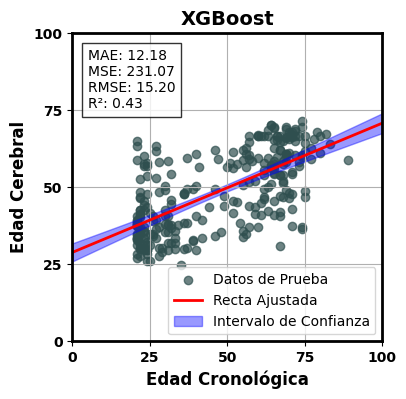

Error medio absoluto: 12.18384333854712
Error cuadrático medio: 231.07176588418824
Raíz del error cuadrático medio: 15.201044894486307
Coeficiente de determinación (R²): 0.42903978201765747


In [28]:
xgb_model.plot_regresion(y=y_pred_top20,x= xgb_model.y_test,label_='Datos de Prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='XGBoost',line_ideal=False,confidence_interval=True, color='darkslategray',alpha=0.7,xlabel='Edad Cronológica',ylabel='Edad Cerebral',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [16]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 768.6063232421875
IAF_OCC_left: 569.3958740234375
IAF_OCC_right: 456.6996765136719
Low_subj_spec_RPD_HPC_left: 405.594482421875
High_subj_spec_EPP_CING_right: 374.420654296875
Low_subj_spec_EPP_PARIET_left: 361.3990478515625
Low_subj_spec_RPD_HPC_right: 337.4725036621094
Low_subj_spec_RPD_OCC_left: 319.9054870605469
Low_subj_spec_EPP_PARIET_right: 319.72381591796875
Low_subj_spec_RPD_CING_right: 295.750244140625
Alpha2_canon_EPP_HPC_left: 267.4786376953125
Low_subj_spec_EPP_CING_left: 256.76318359375
Alpha2_canon_EPP_PARIET_left: 244.02578735351562
High_subj_spec_EPP_OCC_left: 231.66766357421875
Alpha2_canon_RPD_CING_right: 201.69862365722656
High_subj_spec_RPD_CING_right: 195.49659729003906
High_subj_spec_EPP_PARIET_right: 179.3863983154297
Low_subj_spec_RPD_PARIET_left: 175.54803466796875
Alpha2_canon_EPP_PARIET_right: 152.2970733642578
Low_subj_spec_RPD_CING_left: 142.34864807128906


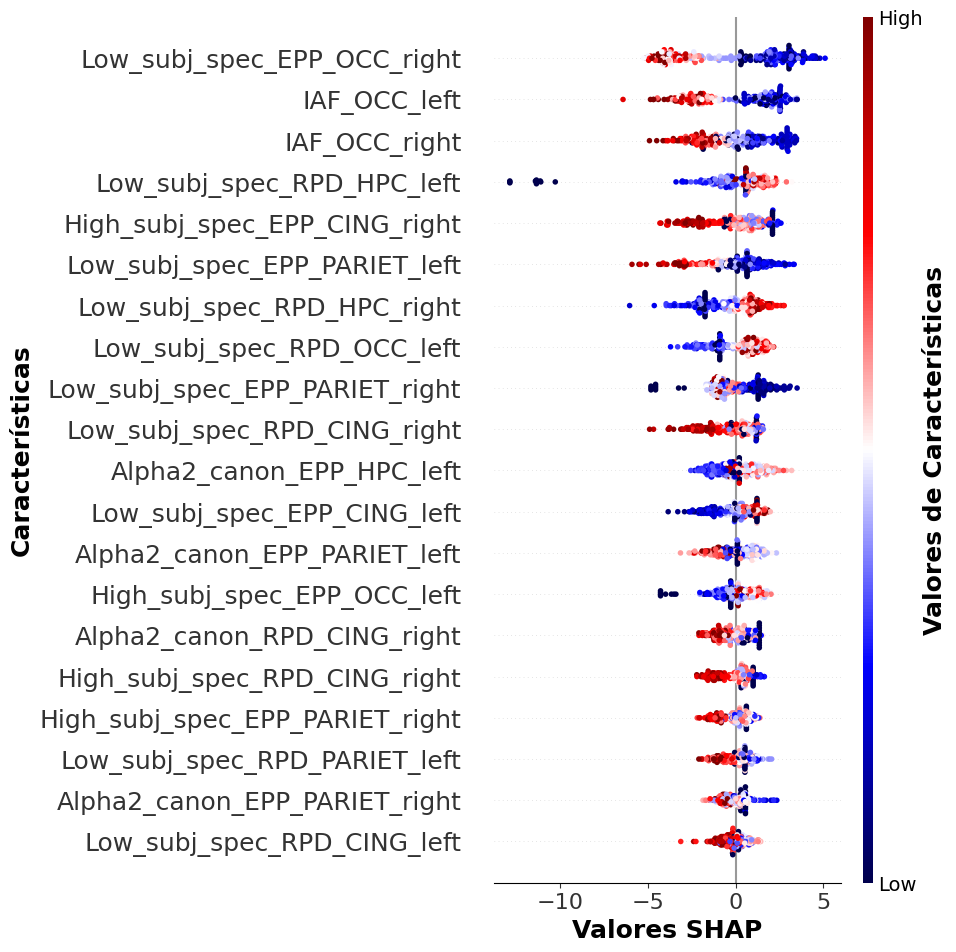

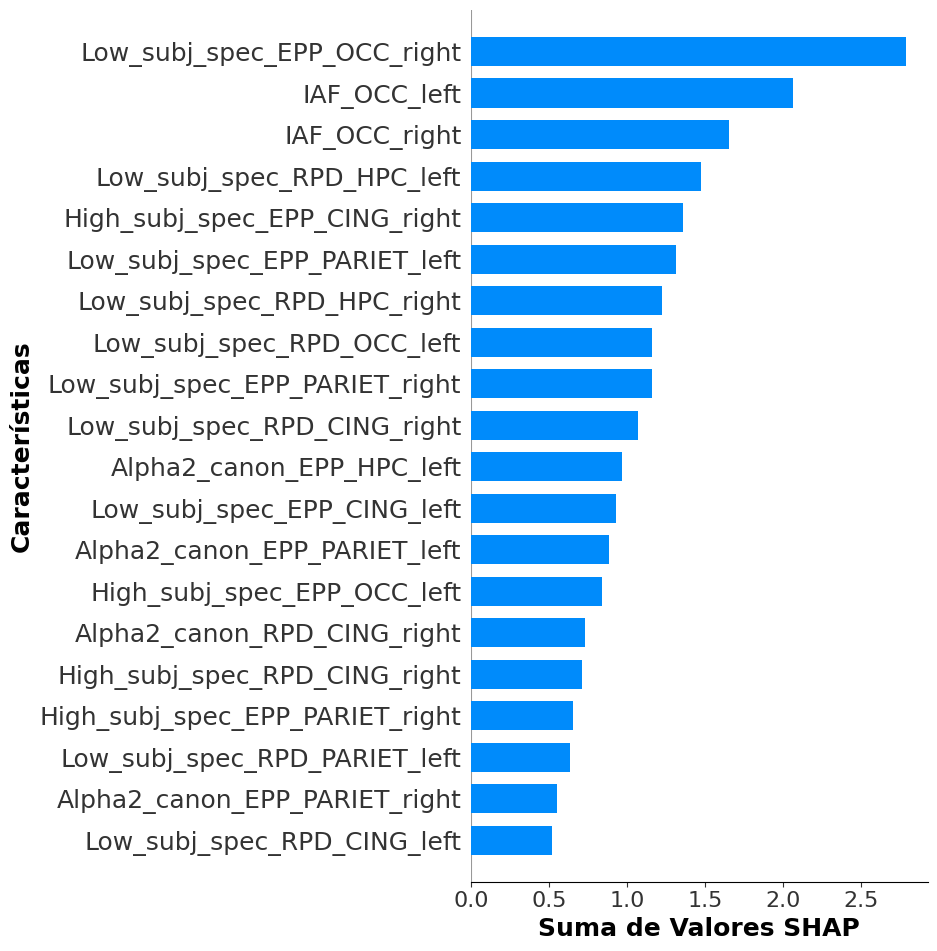

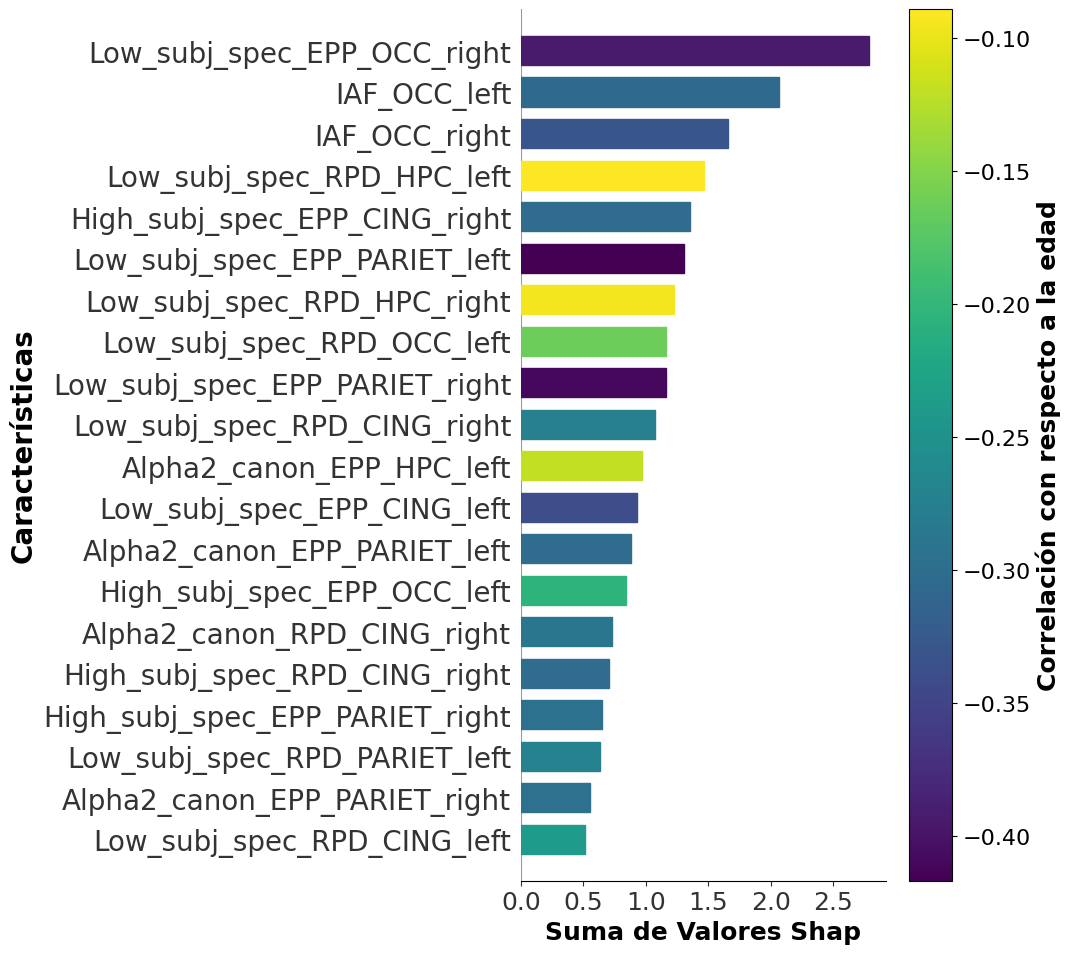

In [17]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=X_test,y_test=xgb_model.y_test)